In [2]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import os 

# Step 1: Load the embeddings
output_folder = "../processed_full_neurips"
embeddings_path = os.path.join(output_folder, "embeddings.npy")
embeddings = np.load(embeddings_path)
dimension = embeddings.shape[1]

print(f"Loaded embeddings with shape: {embeddings.shape}")

# Step 2: Normalize embeddings (for cosine similarity)
faiss.normalize_L2(embeddings)

# Step 3: Perform clustering using FAISS
n_clusters = 10  # Number of clusters (you can adjust this)
kmeans = faiss.Kmeans(d=dimension, k=n_clusters, niter=20, verbose=True, gpu=False)

# Train the k-means model
print("Clustering embeddings into clusters...")
kmeans.train(embeddings)

# Get cluster assignments
_, cluster_assignments = kmeans.index.search(embeddings, 1)  # 1 nearest centroid
cluster_assignments = cluster_assignments.flatten()  # Flatten to 1D array

print(f"Cluster assignments shape: {cluster_assignments.shape}")

# Step 4: Reduce dimensionality for visualization
# First, use PCA to reduce to 50 dimensions (faster for t-SNE)
print("Reducing dimensionality using PCA...")
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)

# Then, use t-SNE for 2D visualization
print("Reducing dimensionality to 2D using t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 5: Plot the clusters
print("Plotting clusters...")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=cluster_assignments,
    palette="tab10",
    legend="full",
    alpha=0.8
)
plt.title("Visualization of Embedding Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
plt.show()

Loaded embeddings with shape: (720112, 384)
Clustering embeddings into clusters...
Sampling a subset of 2560 / 720112 for training
Clustering 2560 points in 384D to 10 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.85 s
  Iteration 19 (1.56 s, search 0.53 s): objective=1774.25 imbalance=1.045 nsplit=0       
Cluster assignments shape: (720112,)
Reducing dimensionality using PCA...
Reducing dimensionality to 2D using t-SNE...


KeyboardInterrupt: 

Reducing dimensionality to 2D using PCA...


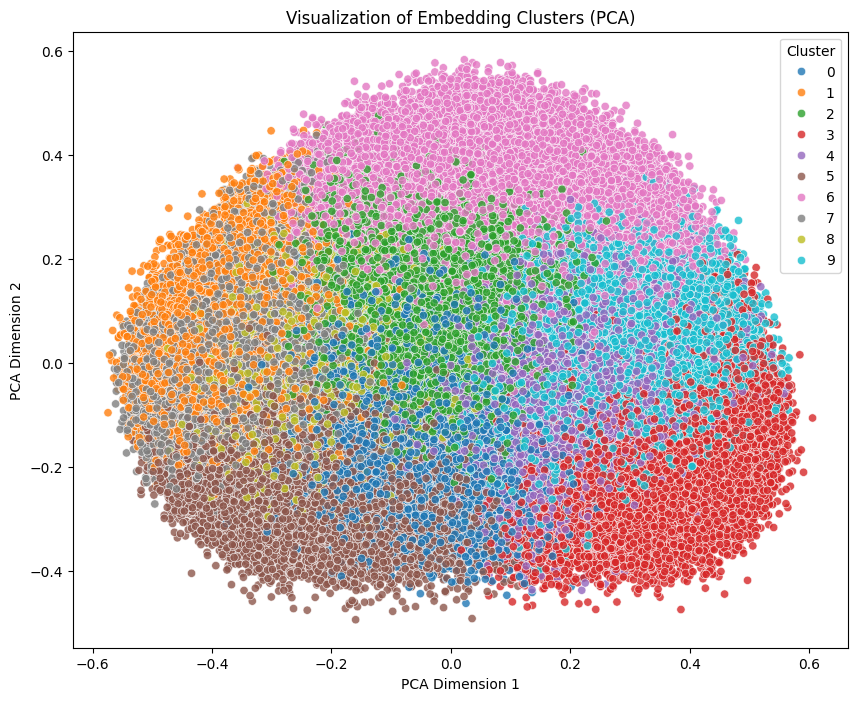

In [3]:
# Reduce dimensionality to 2D using PCA
print("Reducing dimensionality to 2D using PCA...")
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the PCA-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=cluster_assignments,
    palette="tab10",
    legend="full",
    alpha=0.8
)
plt.title("Visualization of Embedding Clusters (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
plt.show()

In [4]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 3.0 MB/s eta 0:00:0000:0100:01


In [5]:
import umap

# Reduce dimensionality to 2D using UMAP
print("Reducing dimensionality to 2D using UMAP...")
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_reducer.fit_transform(embeddings)

# Plot the UMAP-reduced embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=cluster_assignments,
    palette="tab10",
    legend="full",
    alpha=0.8
)
plt.title("Visualization of Embedding Clusters (UMAP)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
plt.show()

/storage/hiu/project_2024/envs/mop/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Reducing dimensionality to 2D using UMAP...


/storage/hiu/project_2024/envs/mop/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
